# Predicting Employee Attrition

Employee attrition is one of the critical factors which affects the organization. Affecting the organization can be of different reasons which include employee knowledge is lost and can be taken to rival organization. Some of the reasons which affect organization lesser is job mismatch, retirement, etc. Attrition is not only the cost for losing the resources, but we also invest in training the newly hired resource. For organizations to be successful, it is essential that the employer and the employee have a good relationship. If the employee decides to leave the organization, there will be challenges the organization faces. It will impact productivity, revenue, experience, and time invested in training. So, we can use some of the machine learning techniques to predict the same. Thus, it is essential for an organization to understand why the employee is leaving them. There could be different reasons for attrition which include lack of professional growth, hostile work environment, declining confidence in the organization market value and leadership.

I am planning to use the dataset from [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) .The dataset helps uncover the factors that lead to employee attrition. This is a fictional dataset created by IBM data scientists. This dataset consists of 1,470 records which describe details about the Employee’s Education, Environment Satisfaction, Job Satisfaction, Performance Rating, Work-life balance, Age, Attrition, Daily Rate, Monthly income of the employee, Marital Status, department of work, distance from home to work for the employee and many other fields. 

In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, std

import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import auc, make_scorer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, average_precision_score, make_scorer

In [2]:
# Read csv file
employee_attrition_df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# Sample records
employee_attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee_attrition_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# Dimension of the data frame
print("The dimension of the table is: ", employee_attrition_df.shape)

The dimension of the table is:  (1470, 35)


In [6]:
# Datatypes of each feature
employee_attrition_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Any missing values
employee_attrition_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
# Understand the categorical data in our dataset
#for column in employee_attrition_df.columns:
#  if employee_attrition_df[column].dtype == object:
#    print("{} : {}".format(str(column), str(employee_attrition_df[column].unique())))
#    print(employee_attrition_df[column].value_counts())
#    print("-----------------------------------------------------\n\n")

Below are our observations so far:
1) Input data has 1470 records and 35 features.\
2) There is no missing values.\
3) EmployeeCount,StandardHours,Over18 feature does not seem to hold much importance since all the records have same value across the dataset.\
4) EmployeeNumber feature is a unique number provided to each employee and it will not be useful for us in our predictions. 

In [9]:
# Drop the 4 features as mentioned above.
employee_attrition_df = employee_attrition_df.drop('EmployeeCount', axis=1)
employee_attrition_df = employee_attrition_df.drop('EmployeeNumber', axis=1)
employee_attrition_df = employee_attrition_df.drop('StandardHours', axis=1)
employee_attrition_df = employee_attrition_df.drop('Over18', axis=1)

#### Graph Analysis/EDA

In [10]:
# Identify the Count of records Attrition
employee_attrition_df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Employee Attrition')

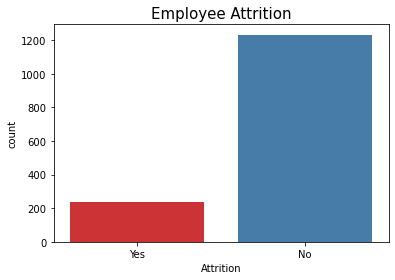

In [11]:
# Plot the Employee Attrition
sns.countplot(employee_attrition_df.Attrition,palette="Set1")
plt.title("Employee Attrition",fontsize=15)
#The Count of records Attrition shows Yes with value of 237 and No with 1233.

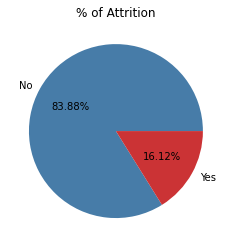

In [12]:
# This graph shows that, majority of employee didnt leave the organization
plt.pie(employee_attrition_df['Attrition'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%',colors=['#477ca8','#cb3335'])
plt.title('% of Attrition')
plt.show()

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


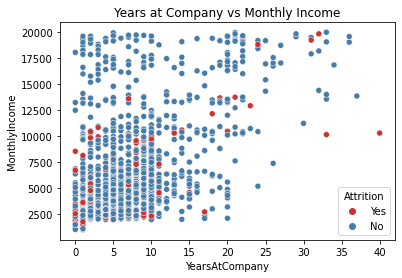

In [13]:
# Scatter plot to compare years at company vs monthly income
sns.scatterplot(employee_attrition_df['YearsAtCompany'], employee_attrition_df['MonthlyIncome'], hue=employee_attrition_df['Attrition'],palette=['#cb3335','#477ca8'])
plt.title('Years at Company vs Monthly Income')
plt.show()

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


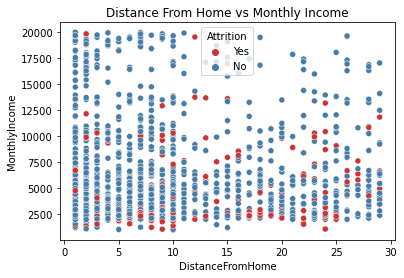

In [14]:
sns.scatterplot(employee_attrition_df['DistanceFromHome'], employee_attrition_df['MonthlyIncome'], hue=employee_attrition_df['Attrition'],palette=['#cb3335','#477ca8'])
plt.title('Distance From Home vs Monthly Income')
plt.show()

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


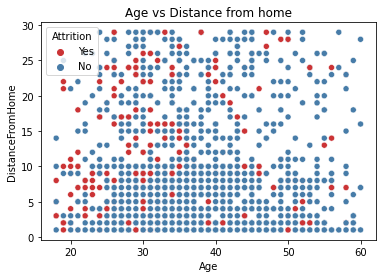

In [15]:
sns.scatterplot(employee_attrition_df['Age'], employee_attrition_df['DistanceFromHome'], hue=employee_attrition_df['Attrition'],palette=['#cb3335','#477ca8'])
plt.title('Age vs Distance from home')
plt.show()

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


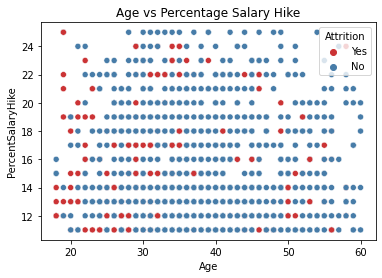

In [16]:
sns.scatterplot(employee_attrition_df['Age'], employee_attrition_df['PercentSalaryHike'], hue=employee_attrition_df['Attrition'],palette=['#cb3335','#477ca8'])
plt.title('Age vs Percentage Salary Hike')
plt.show()

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


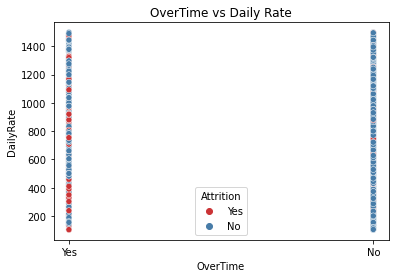

In [17]:
sns.scatterplot(employee_attrition_df['OverTime'], employee_attrition_df['DailyRate'], hue=employee_attrition_df['Attrition'],palette=['#cb3335','#477ca8'])
plt.title('OverTime vs Daily Rate')
plt.show()

C:\Users\mdram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


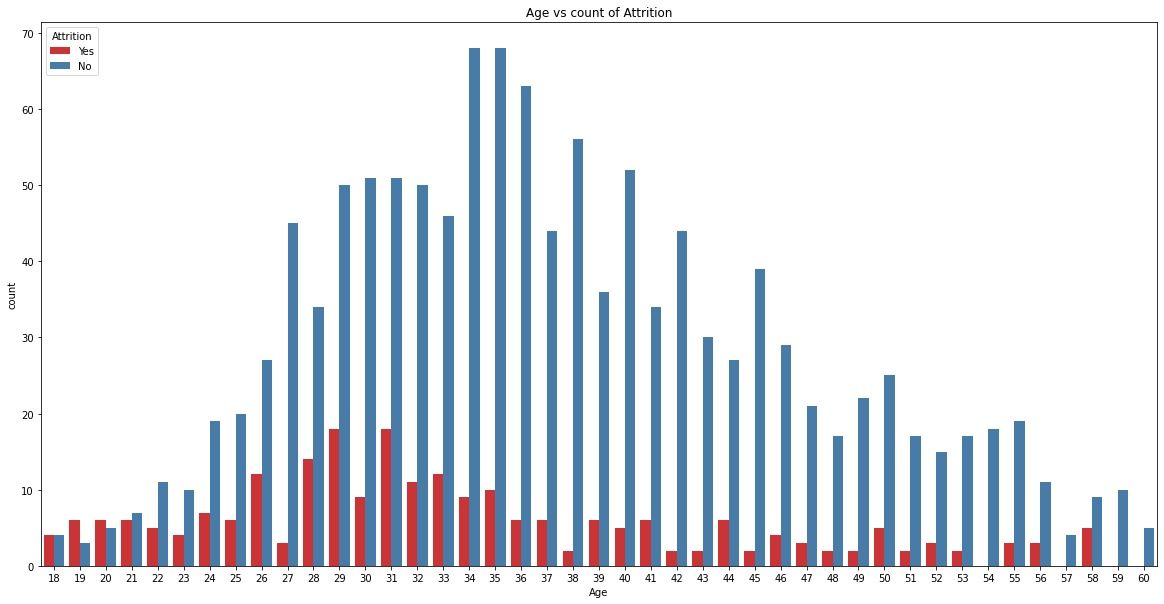

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(employee_attrition_df['Age'],hue=employee_attrition_df['Attrition'],palette="Set1")
plt.title('Age vs count of Attrition')
plt.show()

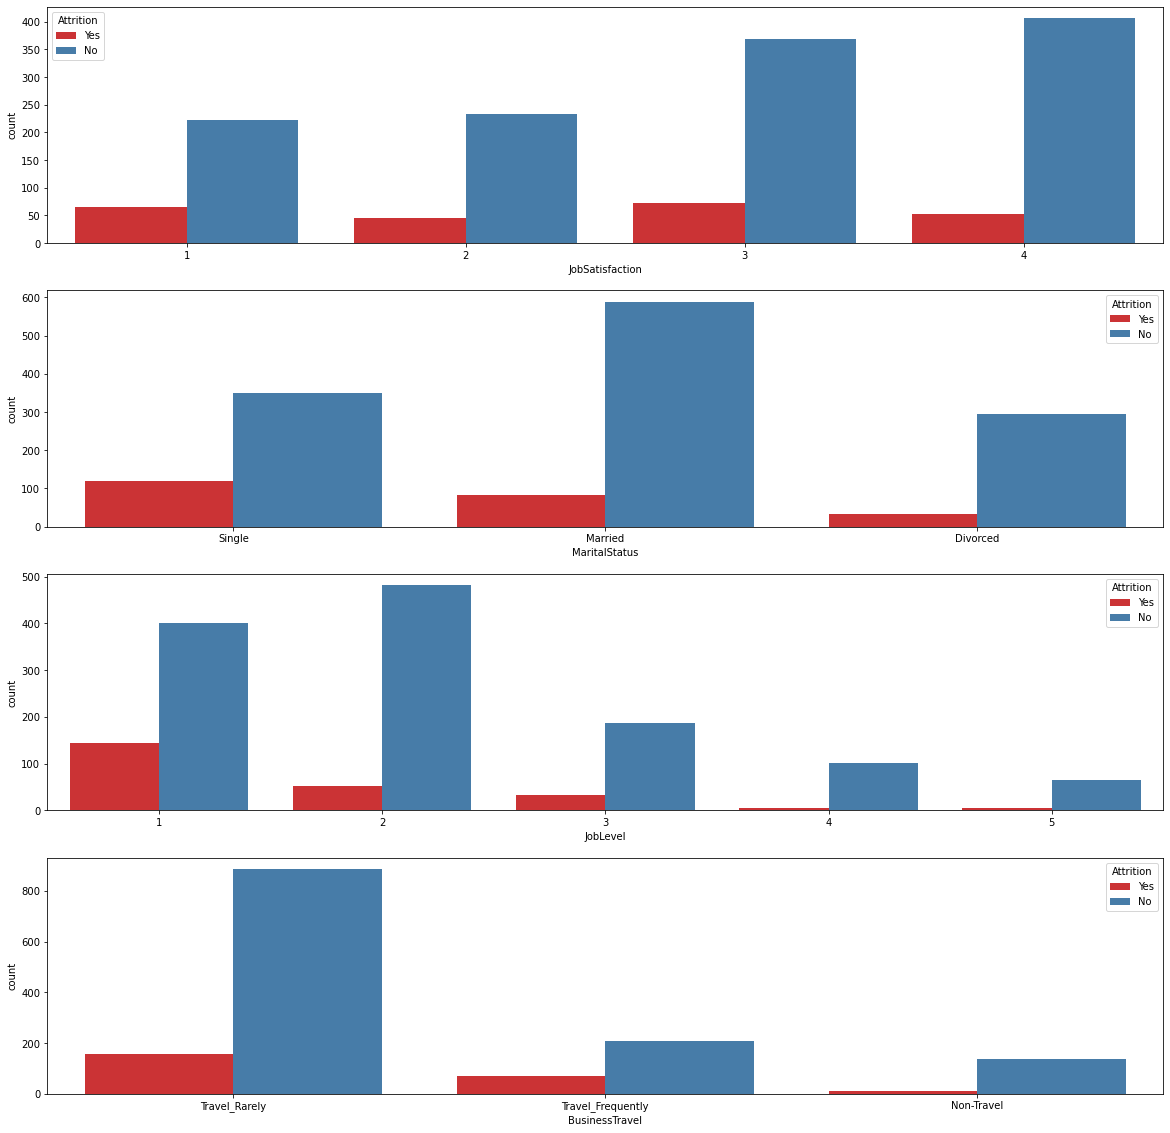

In [19]:
plt.figure(figsize=[20,20])

plt.subplot(411)
sns.countplot(x=employee_attrition_df['JobSatisfaction'],hue=employee_attrition_df['Attrition'],palette="Set1")
plt.subplot(412)
sns.countplot(x=employee_attrition_df['MaritalStatus'],hue=employee_attrition_df['Attrition'],palette="Set1")
plt.subplot(413)
sns.countplot(x=employee_attrition_df['JobLevel'],hue=employee_attrition_df["Attrition"],palette="Set1")
plt.subplot(414)
sns.countplot(x=employee_attrition_df['BusinessTravel'],hue=employee_attrition_df['Attrition'],palette="Set1")

plt.show()

- Employees with less Job Satisfaction are more likely to leave.
- Employees who are not married are more like to leave.
- Employees with JobLevel 1 are more likely to leave.
- Employees who travel a lot are more likely to change job as compared to others.

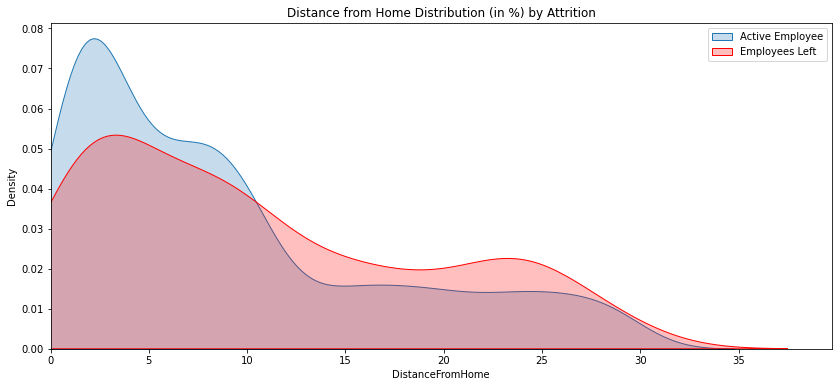

In [20]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee', shade=True)
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Employees Left', color='red', shade=True)
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance from Home Distribution (in %) by Attrition');
leg = plt.legend()

- If Employee travels more than 10 miles is more likely to leave.

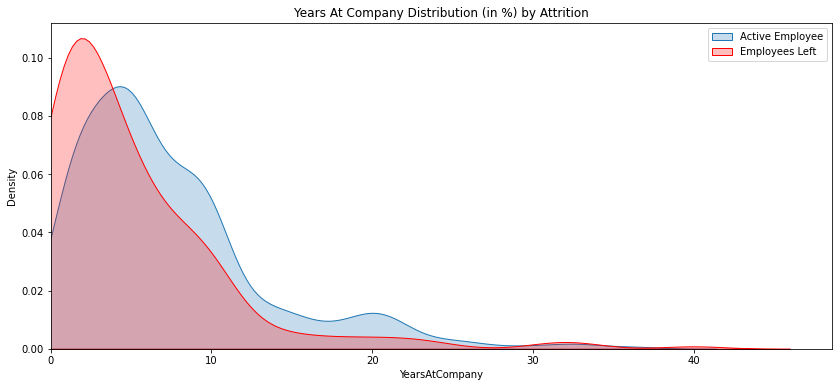

In [21]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee', shade=True)
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Employees Left', color='red', shade=True)
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company Distribution (in %) by Attrition');
leg = plt.legend()

- Employee is more likely to leave in the initial couple of years at the company.

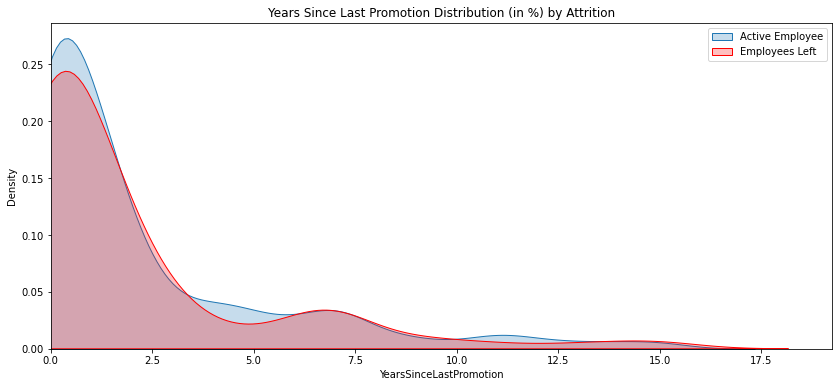

In [22]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee', shade=True)
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Employees Left', color='red', shade=True)
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion Distribution (in %) by Attrition');
leg = plt.legend()

- The distribution is very similar for promotions. so, I does not show a large effect on Attrition. 

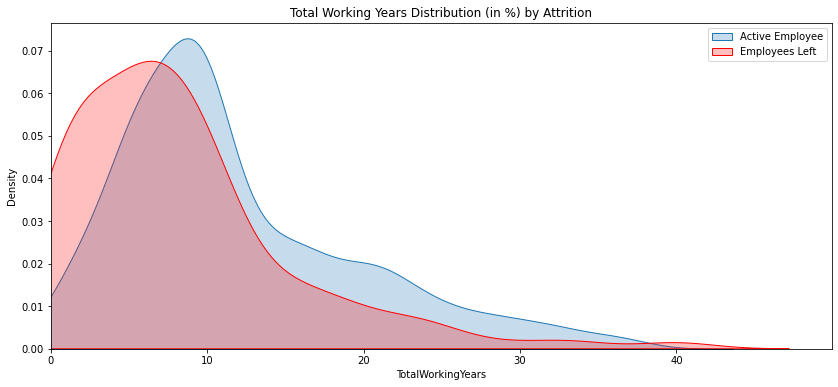

In [23]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee', shade=True)
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Employees Left', color='red', shade=True)
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years Distribution (in %) by Attrition');
leg = plt.legend()

- Employees at the early stage in work profile are more likely to leave (less than 7 years experience). 
- Also There is a increase in number of employees after 40 years.

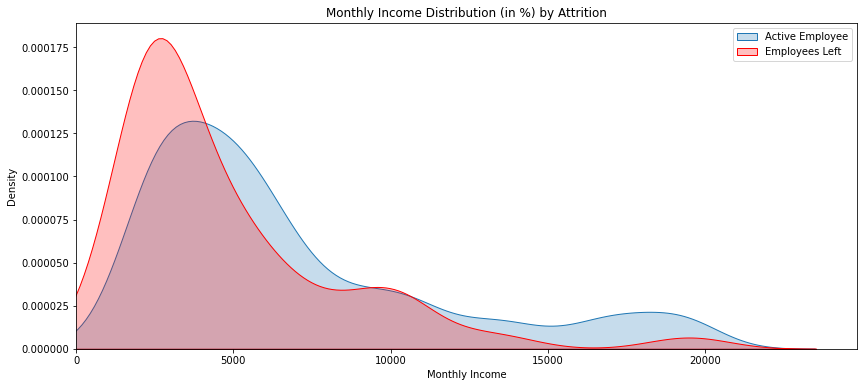

In [24]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee', shade=True)
sns.kdeplot(employee_attrition_df.loc[employee_attrition_df['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Employees Left', color='red', shade=True)
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income Distribution (in %) by Attrition');
leg = plt.legend()

- If the monthly income of employee is less than 5,000. There is more probability he/she oing to leave.

[Text(0, 0, 'Life Sciences'),
 Text(1, 0, 'Other'),
 Text(2, 0, 'Medical'),
 Text(3, 0, 'Marketing'),
 Text(4, 0, 'Technical Degree'),
 Text(5, 0, 'Human Resources')]

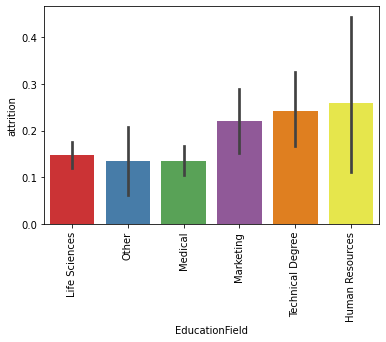

In [25]:
# EducationField vs Attrition
at = pd.DataFrame(employee_attrition_df.Attrition.astype("category").cat.codes)
at.columns = ['attrition']
a = sns.barplot(data=employee_attrition_df, x='EducationField', y=at['attrition'],palette="Set1")
a.set_xticklabels(a.get_xticklabels(), rotation=90)

- Education level of the employee is Human Resources. He/She is more likely to change job.
- Followed by Technical Degree.

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

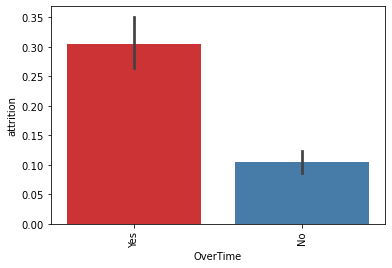

In [26]:
# OverTime vs Attrition
a = sns.barplot(data=employee_attrition_df, x='OverTime', y=at['attrition'],palette="Set1")
a.set_xticklabels(a.get_xticklabels(), rotation=90)

- Employees who do overtime are more likely to leave.

<AxesSubplot:>

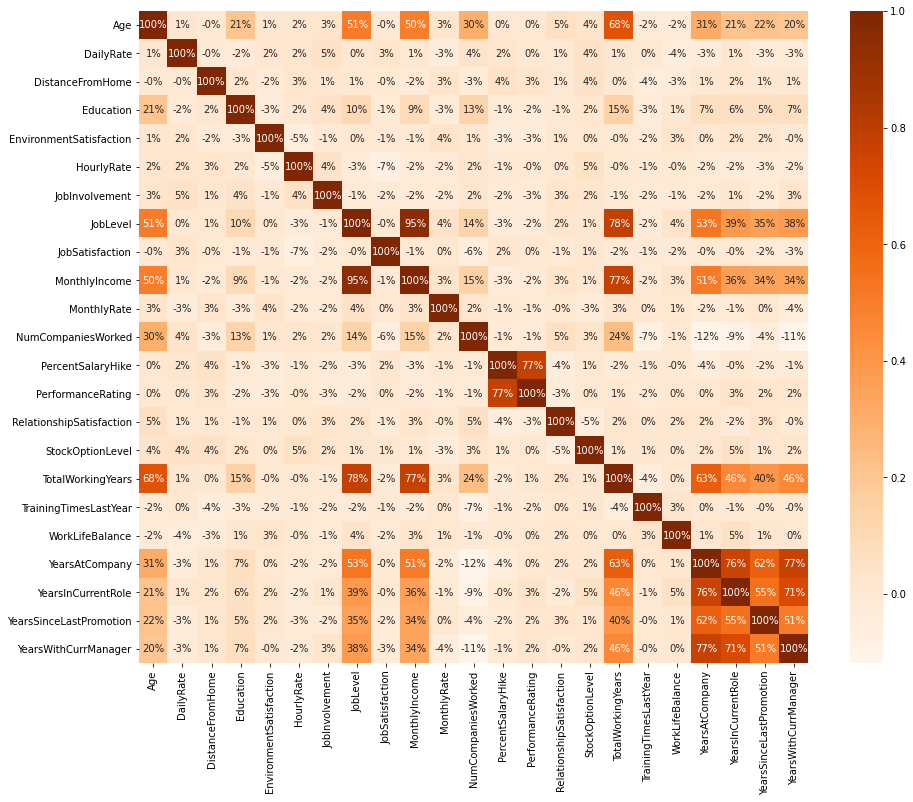

In [27]:
# Pearson Correlation Heatmap
plt.subplots(figsize=(15,12))
sns.heatmap(employee_attrition_df.corr(method = 'pearson'), annot=True, fmt='.0%',cmap="Oranges")

<AxesSubplot:>

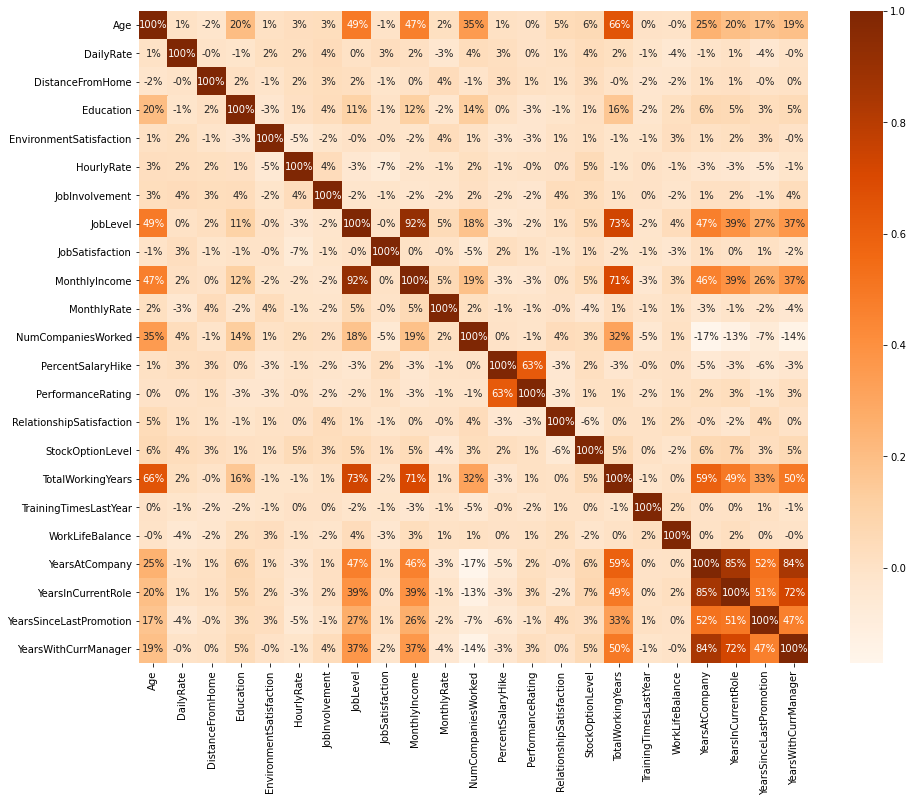

In [28]:
# Spearman Correlation Heatmap
plt.subplots(figsize=(15,12))
sns.heatmap(employee_attrition_df.corr(method = 'spearman'), annot=True, fmt='.0%',cmap="Oranges")

#### Train and Test

In [29]:
# Update the data in Attrition column
# Here we are changing value of Yes to 1 and No to 0
employee_attrition_df['Attrition'].replace({'Yes': 1, 'No': 0}, inplace = True)

# Update the data in BusinessTravel column, by changing value of Non-Travel to 0, Travel_Rarely to 1 and Travel_Frequently to 2
employee_attrition_df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace = True)

# Update the data in Department column, by changing value of Sales to 0, Research & Development to 1 and Human Resources to 2
employee_attrition_df['Department'].replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace = True)

# Update the data in EducationField column, by changing value of Life Sciences to 0, Medical to 1, Marketing to 2, Technical Degree to 3, Human Resources to 4 and Other to 5
employee_attrition_df['EducationField'].replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}, inplace = True)

# Update the data in Gender column, by changing value of Male to 1 and Female to 0
employee_attrition_df['Gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

# Update the data in OverTime column, by changing value of Yes to 1 and No to 0
employee_attrition_df['OverTime'].replace({'Yes': 1, 'No': 0}, inplace = True)

# Update the data in MaritalStatus column, by changing value of Single to 0, Married to 1 and Divorced to 2
employee_attrition_df['MaritalStatus'].replace({'Single': 0, 'Married': 1, 'Divorced': 2}, inplace = True)

# Update the data in JobRole column, by changing value of Sales Executive to 0, Research Scientist to 1, Laboratory Technician to 2, Manufacturing Director to 3, Healthcare Representative to 4, Manager to 5, Sales Representative to 6, Research Director to 7 and Human Resources to 8
employee_attrition_df['JobRole'].replace({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}, inplace = True)

In [30]:
# Train and test data
x=employee_attrition_df.drop(columns=["Attrition"],axis="columns")
y=employee_attrition_df.Attrition

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [32]:
# Details of training dataset
print("Transaction Number x_train dataset: ", x_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)
print("Counts of label '1': {}".format(sum(y_train==1)))
print("Counts of label '0': {} \n".format(sum(y_train==0)))

Transaction Number x_train dataset:  (1176, 30)
Transaction Number y_train dataset:  (1176,)
Transaction Number x_test dataset:  (294, 30)
Transaction Number y_test dataset:  (294,)
Counts of label '1': 198
Counts of label '0': 978 



In [33]:
# Feature selection using Variance Threshold with threshold of 0.5
var = VarianceThreshold(threshold=.5)
var.fit(x_train,y_train)
x_train_var=var.transform(x_train)
x_test_var=var.transform(x_test)

In [34]:
x_train_var.shape

(1176, 24)

In [35]:
# Alternate way to perform feature selection and display the features
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [36]:
variance_threshold_selector(x_train, 0.5)

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1097,24,350,21,2,3,3,57,2,1,2,...,0,14,2,3,2,3,1,1,0,0
727,18,287,5,2,0,2,73,3,1,1,...,1,15,4,0,0,2,0,0,0,0
254,29,1247,20,2,2,4,45,3,2,0,...,2,14,4,1,10,2,3,2,0,2
1175,39,492,12,3,1,4,66,3,2,3,...,4,21,3,0,7,3,5,4,1,0
1341,31,311,20,3,0,2,89,3,2,2,...,1,11,1,1,10,2,10,8,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,750,28,3,0,2,46,4,2,2,...,1,17,4,2,10,3,10,9,6,8
1294,41,447,5,3,0,2,85,4,2,4,...,3,12,1,0,11,3,3,2,1,2
860,22,1256,3,4,0,3,48,2,1,1,...,0,11,2,1,1,5,0,0,0,0
1459,29,1378,13,2,5,4,46,2,2,2,...,4,13,1,1,10,2,4,3,0,3


In [37]:
varth_features=var.get_support()
varth_features

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True])

Variance threshold is calculated based on probability density function of a particular distribution. The values with True are the features selected using Variance threshold technique. 

In [38]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=15)
skbest.fit(x_train,y_train)
x_train_skbest=skbest.transform(x_train)
x_test_skbest=skbest.transform(x_test)

In [39]:
x_train_skbest.shape

(1176, 15)

In [40]:
kbest_features=skbest.get_support()
kbest_features

array([ True,  True, False, False,  True, False, False,  True, False,
       False,  True,  True, False,  True,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False,  True])

In [41]:
# Determine 15 best features using SelectKBest
best_features = SelectKBest(score_func=f_classif, k=15)
fit = best_features.fit(x_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(30,'Score'))         # print all 30 features in the order

                Feature_Name       Score
18                  OverTime  100.311132
14             MaritalStatus   43.759236
27        YearsInCurrentRole   38.222229
11                  JobLevel   35.870737
23         TotalWorkingYears   34.716472
15             MonthlyIncome   30.772677
29      YearsWithCurrManager   30.132851
22          StockOptionLevel   29.112175
0                        Age   28.231477
26            YearsAtCompany   21.120188
1             BusinessTravel   19.304328
10            JobInvolvement   16.499182
13           JobSatisfaction   13.066102
7    EnvironmentSatisfaction    7.725648
4           DistanceFromHome    5.435485
3                 Department    5.327397
25           WorkLifeBalance    4.964564
17        NumCompaniesWorked    4.680062
24     TrainingTimesLastYear    4.326792
6             EducationField    3.645715
2                  DailyRate    1.878639
8                     Gender    1.606105
28   YearsSinceLastPromotion    0.960625
12              

As per SelectKBest 'OverTime' is one of the important features. Variance Threshold Selector 'OverTime' was not one of the important features.  
Due to this I will be using SelectKBest results for training and testing of my models.  

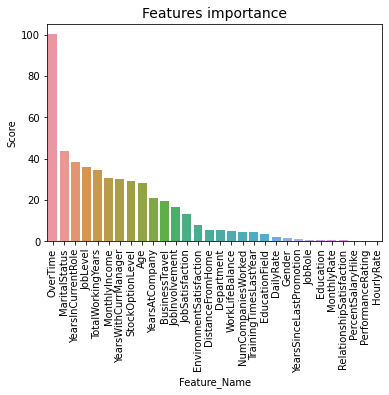

In [42]:
# Bar plot showing features in the order of score
tmp = feature_scores.sort_values(by='Score',ascending=False) 
plt.title('Features importance',fontsize=14) 
s = sns.barplot(x='Feature_Name',y='Score',data=tmp) 
s.set_xticklabels(s.get_xticklabels(),rotation=90) 
plt.show()

### Model Evaluation & Selection

In [43]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [44]:
# Evaluate a model
def evaluate_model(X, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [45]:
# Define reference model
model = DummyClassifier(strategy='constant', constant=1)

SelectKBest returned top 15 features and we will be using this training and test data for further process 

In [46]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# Evaluate the model
scores = evaluate_model(x_train_skbest, y_train, model)
# summarize performance
print('Mean area under curve: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean area under curve: 0.500 (0.000)


In [47]:
# Normalizing the data could improve the performance of the model

scaler = StandardScaler()
scaler.fit(x_train_skbest)
x_train_norm = scaler.transform(x_train_skbest)
x_test_norm = scaler.transform(x_test_skbest)

In [48]:
def model_val(X, y, classifier, scor, show):
  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(classifier, X, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [49]:
# List of models

rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sglc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(x_train_norm, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 0.79 (+/- 0.02)
Score: 0.63 (+/- 0.05)
Score: 0.76 (+/- 0.04)
Score: 0.81 (+/- 0.02)


,roc_auc
RandomForestClassifier,0.794008
DecisionTreeClassifier,0.630306
SGDClassifier,0.764518
LogisticRegression,0.811739


As we can see from the summary table above, the best algorithms are Random Forest Classifier and Logistic Regression for this data set.

#### Random Forest Model Evaluation

In [50]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

As the time taken to process the large dataset is more, just specified the number of estimators instead of hyperparameter grid search. 

In [51]:
parm_gridscv_rf = {'model__n_estimators': [75]}

In [52]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=parm_gridscv_rf, scoring='roc_auc', n_jobs=-1, 
                       pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [53]:
grid_rf.fit(x_train_norm, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring='roc_auc', verbose=1)

In [54]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.326991,0.072233,0.032803,0.003489,75,{'model__n_estimators': 75},0.815689,0.786892,0.772043,0.764423,0.814936,0.790797,0.021283,1


In [55]:
grid_rf.best_score_, grid_rf.best_params_

(0.7907965724751438, {'model__n_estimators': 75})

#### Test Random Forest model

In [56]:
y_pred = grid_rf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_rf.predict_proba(x_test_norm)[:,1]
    except:
        y_score = grid_rf.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[247   8]
 [ 34   5]] 

Classification report
              precision    recall  f1-score   support

           0      0.879     0.969     0.922       255
           1      0.385     0.128     0.192        39

    accuracy                          0.857       294
   macro avg      0.632     0.548     0.557       294
weighted avg      0.813     0.857     0.825       294

Scalar Metrics
        AUROC = 0.763


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

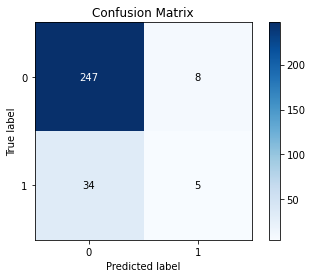

In [57]:
# Plot confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [58]:
def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

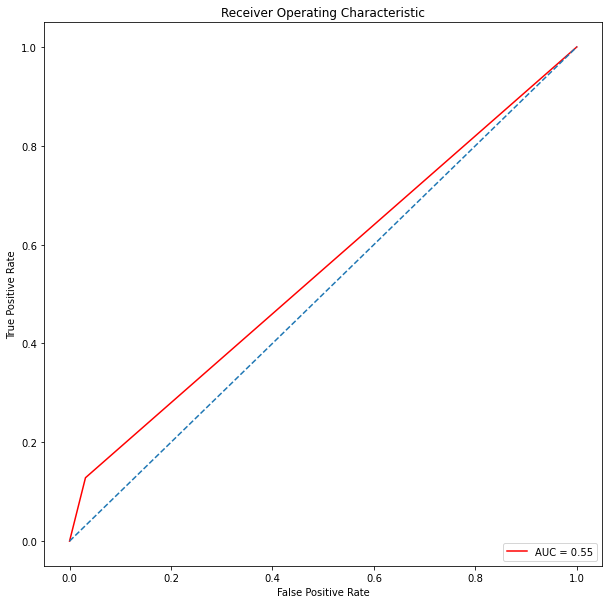

In [59]:
ROC(y_test, y_pred)

In [60]:
log_loss(y_test, y_pred)

4.934132671311872

#### Logistic Regression Model Evaluation

In [61]:
# Logistic regression model with different C values
parameters = {
    'tol': [0.00001, 0.0001, 0.001],
    'C': [1, 50, 100]
}

lgr = GridSearchCV(LogisticRegression(random_state=101, n_jobs=1, max_iter=1000),
                     param_grid=parameters,
                     cv=3,
                     n_jobs=1,
                     scoring='roc_auc'
                    )
lgr.fit(x_train_norm, y_train)
clf = lgr.best_estimator_

print(lgr.best_estimator_)
print("The best classifier score:",lgr.best_score_)

LogisticRegression(C=1, max_iter=1000, n_jobs=1, random_state=101, tol=1e-05)
The best classifier score: 0.8182128028753796


#### Test Logistic Regression Model

In [62]:
y_pred1 = clf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred1), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred1, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score1 = clf.predict_proba(x_test_norm)[:,1]
    except:
        y_score1 = clf.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score1)))

Confusion Matrix
[[247   8]
 [ 27  12]] 

Classification report
              precision    recall  f1-score   support

           0      0.901     0.969     0.934       255
           1      0.600     0.308     0.407        39

    accuracy                          0.881       294
   macro avg      0.751     0.638     0.670       294
weighted avg      0.861     0.881     0.864       294

Scalar Metrics
        AUROC = 0.756


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

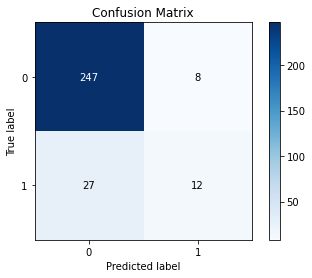

In [63]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred1)

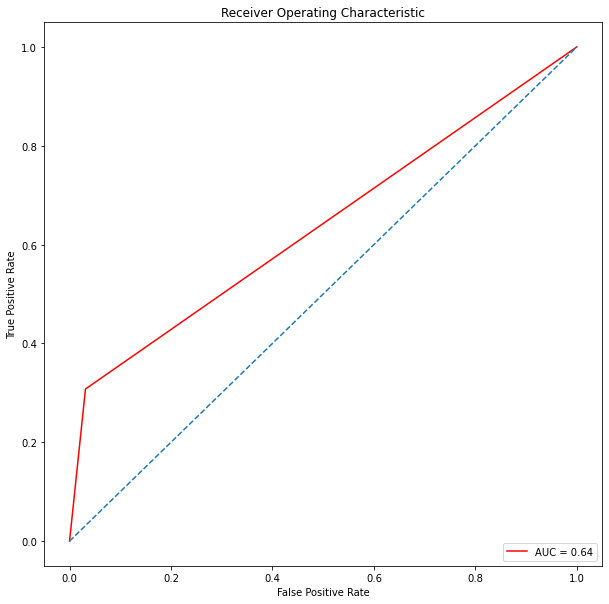

In [64]:
ROC(y_test, y_pred1)

In [65]:
log_loss(y_test, y_pred1)

4.111780852385428

### Conclusion
  
For an Organization to sustain and perform better, It is require to have the employee happy and have him/her learn and grow with them. If we have a good employees leaving, it will not be good for the organization. If an employee leaves, it is important to understand the reason of an employee attrition. 

Using machine learning algorithms, organization will be able to predict employees at risk of leaving them.
  
- As proven by Graph Analysis and SelectKBest, ‘OverTime’ plays a major factor in employee attrition. 
- Using Random Forest Model model we will be able to predict 76.3% of the time,if the employee will leave the company or not.
- Using Logistic Regression model we will be able to predict 75.6% of the time, if the employee will leave the company or not.
